In [2]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000)

17465344/17464789 [==============================] - 3s 0us/step


In [11]:
max([max(word) for word in train_data])

9999

In [31]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    (value, key) for (key, value) in word_index.items())
decoded_review = ''.join(
    reverse_word_index.get(i - 3, '?') for i in train_data[0])

In [33]:
decoded_review[0:50]

'?thisfilmwasjustbrilliantcastinglocationscenerysto'

In [34]:
import numpy as np

In [56]:
def vectorize_sequences(reviews, dimension=10000):
    results = np.zeros((len(reviews), dimension))
    for review_i, word_num in enumerate(reviews):
        results[review_i, word_num] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [57]:
from keras import models
from keras import layers

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# from keras import optimizers
# from keras import losses
# from keras import metrics

#model.compile(optimizer=optimizers.RMSprop(lr=.001),
            # loss=losses.binary_crossentropy,
            # metrics=[metrics.binary_accuracy])

In [63]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - v

In [65]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [66]:
import matplotlib.pyplot as plt

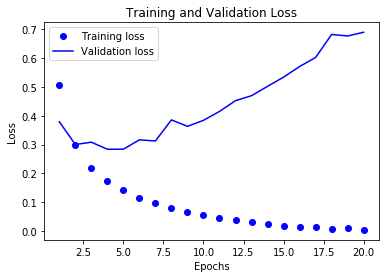

In [69]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

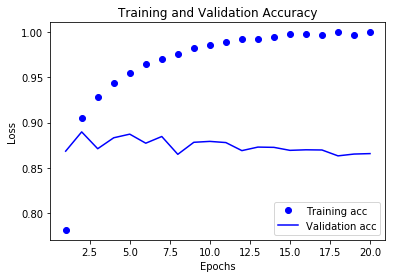

In [71]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [85]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.5465 - acc: 0.7412
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.3049 - acc: 0.9024
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2087 - acc: 0.9272
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


[0.3079248852062225, 0.88212]

In [73]:
model.predict(x_test)

array([[0.13560073],
       [0.9997118 ],
       [0.27816302],
       ...,
       [0.0713997 ],
       [0.04283792],
       [0.47383907]], dtype=float32)

In [74]:
model.predict(x_train)

array([[0.97186995],
       [0.00157274],
       [0.00350424],
       ...,
       [0.01090309],
       [0.9535325 ],
       [0.0671705 ]], dtype=float32)